### Load all the packages

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from shapely.geometry import Point
import missingno as msn
import geopandas

In [3]:
#importing all the data
inpatient = pd.read_csv('inpatientCharges.csv')
hospital = pd.read_csv('us_hospital_locations.csv')
rating = pd.read_csv('Hospital_rating.csv',  encoding='ISO-8859-1')
hospital_geo = geopandas.read_file("Hospitals_and_Medical_Centers.geojson")
doctors = pd.read_csv('doctors.csv')

In [4]:
inpatient.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [5]:
hospital.head(5)

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
3,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,...,2014/02/10 00:00:00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
4,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N


In [6]:
rating.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [7]:
hospital_geo.head(5)

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y,geometry
0,9,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Verdugo Hills Hospital,1812 Verdugo Blvd.,NaN,...,http://egis3.lacounty.gov/lms/?p=560,publish,34.204530,-118.216023,2016-01-29 10:45:00+00:00,NaN,NaN,6.496353e+06,1.896883e+06,POINT (-118.21602 34.20453)
1,11,211,NaN,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,NaN,...,http://egis3.lacounty.gov/lms/?p=561,publish,34.075693,-118.248312,2016-01-21 15:56:47+00:00,NaN,NaN,6.486475e+06,1.850019e+06,POINT (-118.24831 34.07569)
2,20,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendora Community Hospital,150 W. Route 66,NaN,...,http://egis3.lacounty.gov/lms/?p=568,publish,34.127307,-117.865075,2016-01-22 14:39:39+00:00,NaN,NaN,6.602504e+06,1.868737e+06,POINT (-117.86507 34.12731)
3,25,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Providence Little Company of Mary Medical Center,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,NaN,...,http://egis3.lacounty.gov/lms/?p=569,publish,33.838634,-118.357113,2016-01-27 11:34:40+00:00,NaN,NaN,6.453221e+06,1.763848e+06,POINT (-118.35711 33.83863)
4,35,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,NaN,...,http://egis3.lacounty.gov/lms/?p=570,publish,34.128058,-118.257443,2016-01-22 16:10:02+00:00,NaN,NaN,6.483758e+06,1.869083e+06,POINT (-118.25744 34.12806)


In [8]:
doctors.head(5)

,Date,County,Primary Area of Practice,Activities in Medicine,Count of Physicians
0,7/1/20,Alameda,All Other Specialties,No Response,3
1,7/1/20,Alameda,All Other Specialties,Patient Care - 1-9 Hours,34
2,7/1/20,Alameda,All Other Specialties,Patient Care - 10-19 Hours,46
3,7/1/20,Alameda,All Other Specialties,Patient Care - 20-29 Hours,71
4,7/1/20,Alameda,All Other Specialties,Patient Care - 30-39 Hours,104


### Filter the dataframes based on California and Los Angeles

#### Inpatient dataset

In [9]:
# filter the dataframes based on California state for the providers
inpatient = inpatient.loc[inpatient['Provider State'] == "CA"]

In [10]:
inpatient.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
64,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48,$44664.45,$8227.14,$6936.52
65,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50007,PENINSULA MEDICAL CENTER,1501 TROUSDALE DRIVE,BURLINGAME,CA,94010,CA - San Mateo County,16,$51950.87,$7863.00,$6872.50
66,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50013,ST HELENA HOSPITAL,10 WOODLAND ROAD,SAINT HELENA,CA,94574,CA - Napa,17,$105929.47,$9438.00,$8376.35
67,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50017,MERCY GENERAL HOSPITAL,4001 J ST,SACRAMENTO,CA,95819,CA - Sacramento,27,$66207.66,$10863.22,$6924.70
68,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50026,GROSSMONT HOSPITAL,5555 GROSSMONT CENTER DRIVE BOX 58,LA MESA,CA,91942,CA - San Diego,26,$40062.46,$7449.80,$6358.07


In [13]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13064 entries, 64 to 161505
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   DRG Definition                        13064 non-null  object
 1   Provider Id                           13064 non-null  int64 
 2   Provider Name                         13064 non-null  object
 3   Provider Street Address               13064 non-null  object
 4   Provider City                         13064 non-null  object
 5   Provider State                        13064 non-null  object
 6   Provider Zip Code                     13064 non-null  int64 
 7   Hospital Referral Region Description  13064 non-null  object
 8    Total Discharges                     13064 non-null  int64 
 9    Average Covered Charges              13064 non-null  object
 10   Average Total Payments               13064 non-null  object
 11  Average Medicare Payments 

In [14]:
inpatient.isna().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [15]:
inpatient.drop_duplicates()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
64,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48,$44664.45,$8227.14,$6936.52
65,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50007,PENINSULA MEDICAL CENTER,1501 TROUSDALE DRIVE,BURLINGAME,CA,94010,CA - San Mateo County,16,$51950.87,$7863.00,$6872.50
66,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50013,ST HELENA HOSPITAL,10 WOODLAND ROAD,SAINT HELENA,CA,94574,CA - Napa,17,$105929.47,$9438.00,$8376.35
67,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50017,MERCY GENERAL HOSPITAL,4001 J ST,SACRAMENTO,CA,95819,CA - Sacramento,27,$66207.66,$10863.22,$6924.70
68,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50026,GROSSMONT HOSPITAL,5555 GROSSMONT CENTER DRIVE BOX 58,LA MESA,CA,91942,CA - San Diego,26,$40062.46,$7449.80,$6358.07
...,...,...,...,...,...,...,...,...,...,...,...,...
161501,948 - SIGNS & SYMPTOMS W/O MCC,50752,BROTMAN MEDICAL CENTER,3828 DELMAS TERRACE,CULVER CITY,CA,90231,CA - Los Angeles,15,$27754.40,$5271.00,$4744.86
161502,948 - SIGNS & SYMPTOMS W/O MCC,50755,SHERMAN OAKS HOSPITAL,4929 VAN NUYS BLVD,SHERMAN OAKS,CA,91403,CA - Los Angeles,12,$14632.33,$4951.50,$4299.16
161503,948 - SIGNS & SYMPTOMS W/O MCC,50757,ALVARADO HOSPITAL MEDICAL CENTER,6655 ALVARADO ROAD,SAN DIEGO,CA,92120,CA - San Diego,11,$17830.27,$4820.81,$4000.45
161504,948 - SIGNS & SYMPTOMS W/O MCC,50761,PROVIDENCE TARZANA MEDICAL CENTER,18321 CLARK STREET,TARZANA,CA,91356,CA - Los Angeles,21,$38851.04,$4739.71,$3988.09


#### Hospital dataset

In [16]:
hospital = hospital.loc[hospital['CITY'] == "LOS ANGELES"]

In [17]:
hospital.head(5)

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
74,-1.316845e+07,4.042046e+06,76,19090027,KAISER FOUNDATION LOS ANGELES MEDICAL CENTER,4867 SUNSET BOULEVARD,LOS ANGELES,CA,90027,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.kaiserpermanente.org,NOT AVAILABLE,NOT AVAILABLE,6,NON-PROFIT,-999,460,NOT AVAILABLE,N
77,-1.316758e+07,4.037830e+06,79,42990020,SHRINERS HOSPITAL FOR CHILDREN - L.A.,3160 GENEVA STREET,LOS ANGELES,CA,90020,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.shrinershospitalsforchildren.org/ho...,NOT AVAILABLE,NOT AVAILABLE,6,NON-PROFIT,-999,60,NOT AVAILABLE,N
850,-1.317605e+07,4.036508e+06,853,30190036,DOCS SURGICAL HOSPITAL,6000 SAN VICENTE BOULEVARD,LOS ANGELES,CA,90036,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.miraclemilemedicalcenter.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,17,NOT AVAILABLE,N
851,-1.317583e+07,4.036498e+06,854,33090036,OLYMPIA MEDICAL CENTER,5900 WEST OLYMPIA BLVD,LOS ANGELES,CA,90036,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.olympiamc.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,204,NOT AVAILABLE,N


In [19]:
hospital.shape

(33, 34)

In [20]:
hospital.isna().sum()

X             0
Y             0
FID           0
ID            0
NAME          0
ADDRESS       0
CITY          0
STATE         0
ZIP           0
ZIP4          0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
SOURCEDATE    0
VAL_METHOD    0
VAL_DATE      0
WEBSITE       0
STATE_ID      0
ALT_NAME      0
ST_FIPS       0
OWNER         0
TTL_STAFF     0
BEDS          0
TRAUMA        0
HELIPAD       0
dtype: int64

In [23]:
hospital.dropna(axis = 0, inplace = True)

In [25]:
hospital.dropna(axis =1 , inplace= True)

In [26]:
hospital.shape

(33, 34)

In [27]:
hospital.drop_duplicates()

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
74,-1.316845e+07,4.042046e+06,76,19090027,KAISER FOUNDATION LOS ANGELES MEDICAL CENTER,4867 SUNSET BOULEVARD,LOS ANGELES,CA,90027,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.kaiserpermanente.org,NOT AVAILABLE,NOT AVAILABLE,6,NON-PROFIT,-999,460,NOT AVAILABLE,N
77,-1.316758e+07,4.037830e+06,79,42990020,SHRINERS HOSPITAL FOR CHILDREN - L.A.,3160 GENEVA STREET,LOS ANGELES,CA,90020,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.shrinershospitalsforchildren.org/ho...,NOT AVAILABLE,NOT AVAILABLE,6,NON-PROFIT,-999,60,NOT AVAILABLE,N
850,-1.317605e+07,4.036508e+06,853,30190036,DOCS SURGICAL HOSPITAL,6000 SAN VICENTE BOULEVARD,LOS ANGELES,CA,90036,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.miraclemilemedicalcenter.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,17,NOT AVAILABLE,N
851,-1.317583e+07,4.036498e+06,854,33090036,OLYMPIA MEDICAL CENTER,5900 WEST OLYMPIA BLVD,LOS ANGELES,CA,90036,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.olympiamc.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,204,NOT AVAILABLE,N
852,-1.316233e+07,4.037517e+06,855,33390012,"PACIFIC ALLIANCE MEDICAL CENTER, INC.",531 WEST COLLEGE STREET,LOS ANGELES,CA,90012,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.pamc.net,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,138,NOT AVAILABLE,N
875,-1.318155e+07,4.036741e+06,878,70790067,"CALIFORNIA REHABILITATION INSTITUTE, LLC",2070 CENTURY PARK EAST,LOS ANGELES,CA,90067,NOT AVAILABLE,...,2015/05/15 00:00:00,https://www.californiarehabinstitute.com/,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - LOCAL,-999,138,NOT AVAILABLE,N
1670,-1.316224e+07,4.035789e+06,1673,690012,LOS ANGELES AMBULATORY CARE CENTER,351 E TEMPLE ST,LOS ANGELES,CA,90012,NOT AVAILABLE,...,2015/05/13 00:00:00,http://www.losangeles.va.gov/,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - FEDERAL,-999,-999,NOT AVAILABLE,N
1695,-1.316280e+07,4.037788e+06,1698,19190012,KAISER FND HOSP - MENTAL HEALTH CENTER,765 COLLEGE STREET,LOS ANGELES,CA,90012,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.kaiserpermanente.org,NOT AVAILABLE,NOT AVAILABLE,6,NON-PROFIT,-999,68,NOT AVAILABLE,N
2190,-1.318541e+07,4.037588e+06,2193,37490095,RESNICK NEUROPSYCHIATRIC HOSPITAL AT UCLA,150 MEDICAL PLAZA,LOS ANGELES,CA,90095,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.semel.ucla.edu/resnick,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,74,NOT AVAILABLE,Y


#### Rating dataset

In [28]:
rating = rating.loc[rating['City'] == "LOS ANGELES"]

In [29]:
rating.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
267,50018,PACIFIC ALLIANCE MEDICAL CENTER,531 W COLLEGE ST,LOS ANGELES,CA,90012,LOS ANGELES,2136248411,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...
288,50063,HOLLYWOOD PRESBYTERIAN MEDICAL CENTER,1300 N VERMONT AVE,LOS ANGELES,CA,90027,LOS ANGELES,2134133000,Acute Care Hospitals,Proprietary,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN
310,50103,WHITE MEMORIAL MEDICAL CENTER,1720 E CESAR AVENUE,LOS ANGELES,CA,90033,LOS ANGELES,3232685000,Acute Care Hospitals,Voluntary non-profit - Church,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN
334,50138,KAISER FOUNDATION HOSPITAL - LOS ANGELES,4867 SUNSET BLVD,LOS ANGELES,CA,90027,LOS ANGELES,3237834011,Acute Care Hospitals,Voluntary non-profit - Other,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...
338,50149,CALIFORNIA HOSPITAL MEDICAL CENTER LA,1401 SOUTH GRAND AVENUE,LOS ANGELES,CA,90015,LOS ANGELES,2137482411,Acute Care Hospitals,Voluntary non-profit - Other,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN


In [30]:
rating.drop_duplicates()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
267,50018,PACIFIC ALLIANCE MEDICAL CENTER,531 W COLLEGE ST,LOS ANGELES,CA,90012,LOS ANGELES,2136248411,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...
288,50063,HOLLYWOOD PRESBYTERIAN MEDICAL CENTER,1300 N VERMONT AVE,LOS ANGELES,CA,90027,LOS ANGELES,2134133000,Acute Care Hospitals,Proprietary,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN
310,50103,WHITE MEMORIAL MEDICAL CENTER,1720 E CESAR AVENUE,LOS ANGELES,CA,90033,LOS ANGELES,3232685000,Acute Care Hospitals,Voluntary non-profit - Church,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN
334,50138,KAISER FOUNDATION HOSPITAL - LOS ANGELES,4867 SUNSET BLVD,LOS ANGELES,CA,90027,LOS ANGELES,3237834011,Acute Care Hospitals,Voluntary non-profit - Other,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...
338,50149,CALIFORNIA HOSPITAL MEDICAL CENTER LA,1401 SOUTH GRAND AVENUE,LOS ANGELES,CA,90015,LOS ANGELES,2137482411,Acute Care Hospitals,Voluntary non-profit - Other,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN
379,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,LOS ANGELES,3108256301,Acute Care Hospitals,Government - State,...,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN
418,50373,LAC+USC MEDICAL CENTER,"1200 N STATE ST, ROOM C2K100",LOS ANGELES,CA,90033,LOS ANGELES,3232262800,Acute Care Hospitals,Government - Local,...,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Not Available,Results are not available for this reporting p...
444,50471,GOOD SAMARITAN HOSPITAL,1225 WILSHIRE BOULEVARD,LOS ANGELES,CA,90017,LOS ANGELES,2139772121,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
451,50502,SAINT VINCENT MEDICAL CENTER,2131 W 3RD ST,LOS ANGELES,CA,90057,LOS ANGELES,2134847111,Acute Care Hospitals,Voluntary non-profit - Church,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN
473,50561,KAISER FOUNDATION HOSPITAL - WEST LA,6041 CADILLAC AVE,LOS ANGELES,CA,90034,LOS ANGELES,2138572201,Acute Care Hospitals,Voluntary non-profit - Private,...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...


In [34]:
rating.dropna(axis=1, inplace= True)

In [33]:
rating.shape

(20, 28)

#### Doctor's dataset

In [35]:
doctors = doctors.loc[doctors['County'] == "Los Angeles"]

In [36]:
doctors.head(5)

,Date,County,Primary Area of Practice,Activities in Medicine,Count of Physicians
1311,7/1/20,Los Angeles,All Other Specialties,No Response,33
1312,7/1/20,Los Angeles,All Other Specialties,Patient Care - 1-9 Hours,203
1313,7/1/20,Los Angeles,All Other Specialties,Patient Care - 10-19 Hours,213
1314,7/1/20,Los Angeles,All Other Specialties,Patient Care - 20-29 Hours,376
1315,7/1/20,Los Angeles,All Other Specialties,Patient Care - 30-39 Hours,609


In [37]:
# shape of the dataframes
hospital_geo.shape

(165, 30)

In [38]:
inpatient.shape

(13064, 12)

In [39]:
rating.shape

(20, 19)

In [40]:
doctors.shape

(195, 5)

### Merge the datasets

In [41]:
#do inner join on inpatient and rating datasets
inpatient_plus_rating = pd.merge(inpatient, rating, left_on=['Provider Id'],right_on=["Provider ID"])

In [42]:
inpatient_plus_rating.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,$36730.69,...,Government - State,Yes,3,Above the national average,Below the national average,Below the national average,Above the national average,Same as the national average,Below the national average,Below the national average
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,33,$44037.48,...,Government - State,Yes,3,Above the national average,Below the national average,Below the national average,Above the national average,Same as the national average,Below the national average,Below the national average
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,62,$88198.08,...,Government - State,Yes,3,Above the national average,Below the national average,Below the national average,Above the national average,Same as the national average,Below the national average,Below the national average
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,43,$62601.39,...,Government - State,Yes,3,Above the national average,Below the national average,Below the national average,Above the national average,Same as the national average,Below the national average,Below the national average
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,24,$35951.12,...,Government - State,Yes,3,Above the national average,Below the national average,Below the national average,Above the national average,Same as the national average,Below the national average,Below the national average


In [43]:
inpatient_plus_rating.shape

(724, 31)

In [44]:
#inner join hospital location dataset to the merged data using Provider Name
hosp_df = pd.merge(inpatient_plus_rating, hospital, left_on=['Provider Name'],right_on=["NAME"])

In [45]:
hosp_df.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,$36730.69,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,33,$44037.48,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,62,$88198.08,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,43,$62601.39,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,24,$35951.12,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y


In [46]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   DRG Definition                                        325 non-null    object 
 1   Provider Id                                           325 non-null    int64  
 2   Provider Name                                         325 non-null    object 
 3   Provider Street Address                               325 non-null    object 
 4   Provider City                                         325 non-null    object 
 5   Provider State                                        325 non-null    object 
 6   Provider Zip Code                                     325 non-null    int64  
 7   Hospital Referral Region Description                  325 non-null    object 
 8    Total Discharges                                     325 no

In [47]:
hosp_df.City

0      LOS ANGELES
1      LOS ANGELES
2      LOS ANGELES
3      LOS ANGELES
4      LOS ANGELES
          ...     
320    LOS ANGELES
321    LOS ANGELES
322    LOS ANGELES
323    LOS ANGELES
324    LOS ANGELES
Name: City, Length: 325, dtype: object

In [48]:
# we have to rename the column city in the hosp_df
# rename the "city" column to "City"
hosp_df = hosp_df.rename(columns={'City': 'city'})

In [49]:
hosp_df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments', 'Provider ID',
       'Hospital Name', 'Address', 'city', 'State', 'ZIP Code', 'County Name',
       'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison', 'X', 'Y', 'FID',
       'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4', 'TELEPHONE',
       'TYPE', 'STATUS', 'POPULATION', 'COUNT

In [50]:
# Format the values in the City column
hosp_df['city'] = hosp_df['city'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

In [68]:
hosp_df[' Average Covered Charges '] = hosp_df[' Average Covered Charges '].str[1:].astype(float)
hosp_df[' Average Total Payments '] = hosp_df[' Average Total Payments '].str[1:].astype(float)
hosp_df['Average Medicare Payments'] = hosp_df['Average Medicare Payments'].str[1:].astype(float)
hosp_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,36730.69,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,33,44037.48,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,62,88198.08,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,43,62601.39,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,24,35951.12,...,2013/10/15 00:00:00,http://www.uclahealth.org,NOT AVAILABLE,NOT AVAILABLE,6,GOVERNMENT - STATE,-999,466,"LEVEL I, LEVEL I PEDIATRIC",Y


### Visualizations

<Axes: xlabel='BEDS', ylabel='Count'>

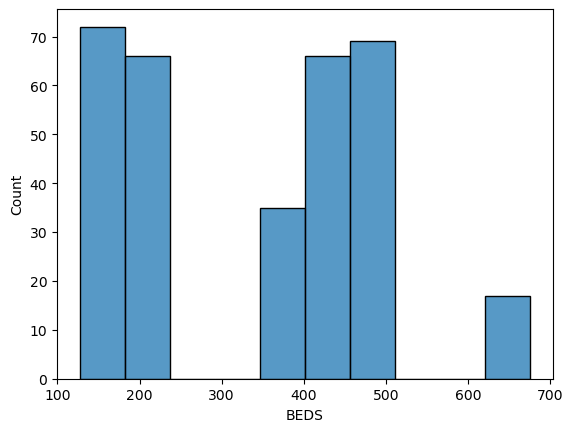

In [72]:
#frequency of beds
sns.histplot(x=hosp_df["BEDS"])

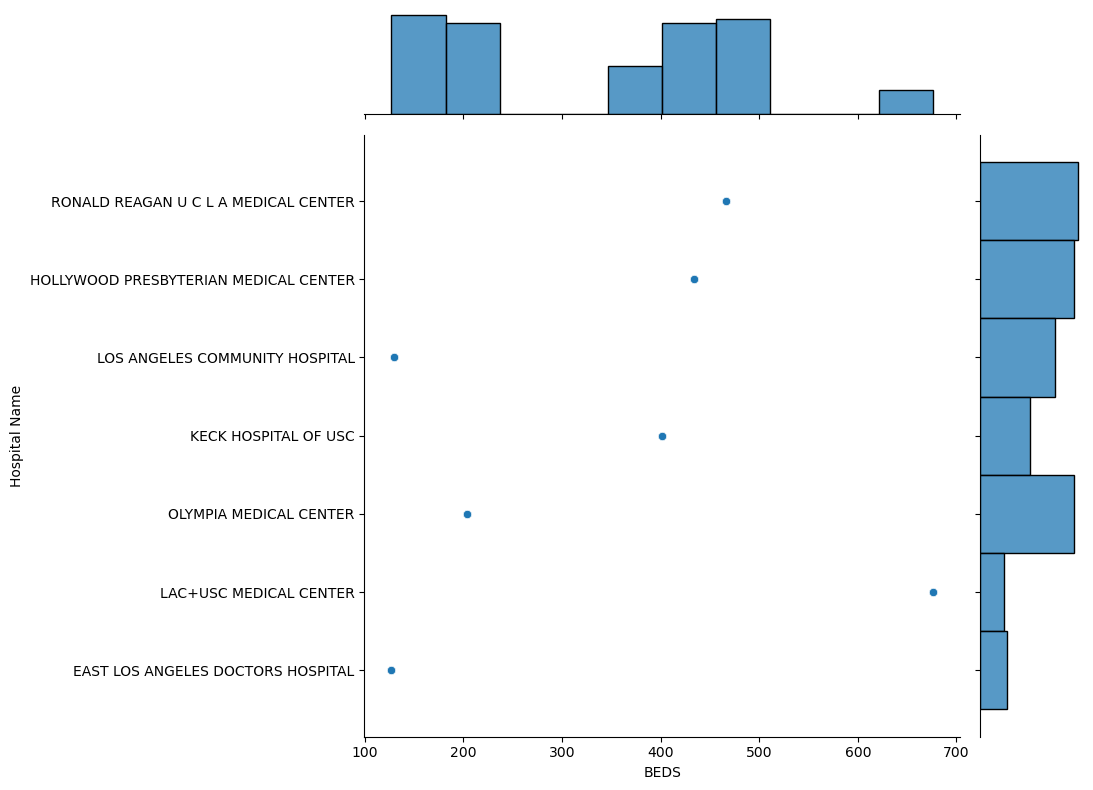

In [73]:
# Plot the hospital ratings and number of beds using a jointplot
sns.jointplot(data=hosp_df, x='BEDS', y='Hospital Name', height=8)


<Axes: xlabel='count', ylabel='TRAUMA'>

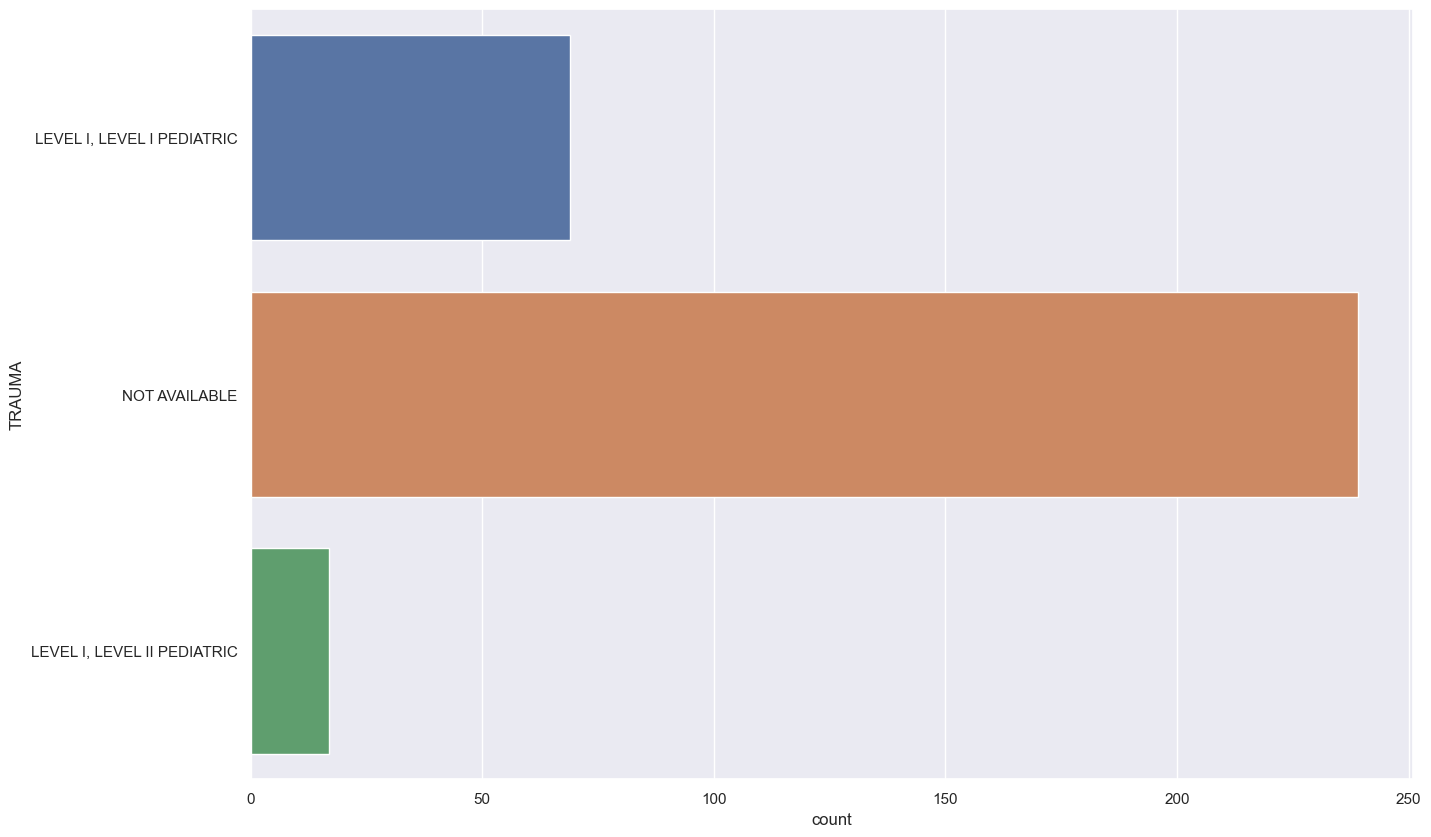

In [74]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(y=hosp_df["TRAUMA"])

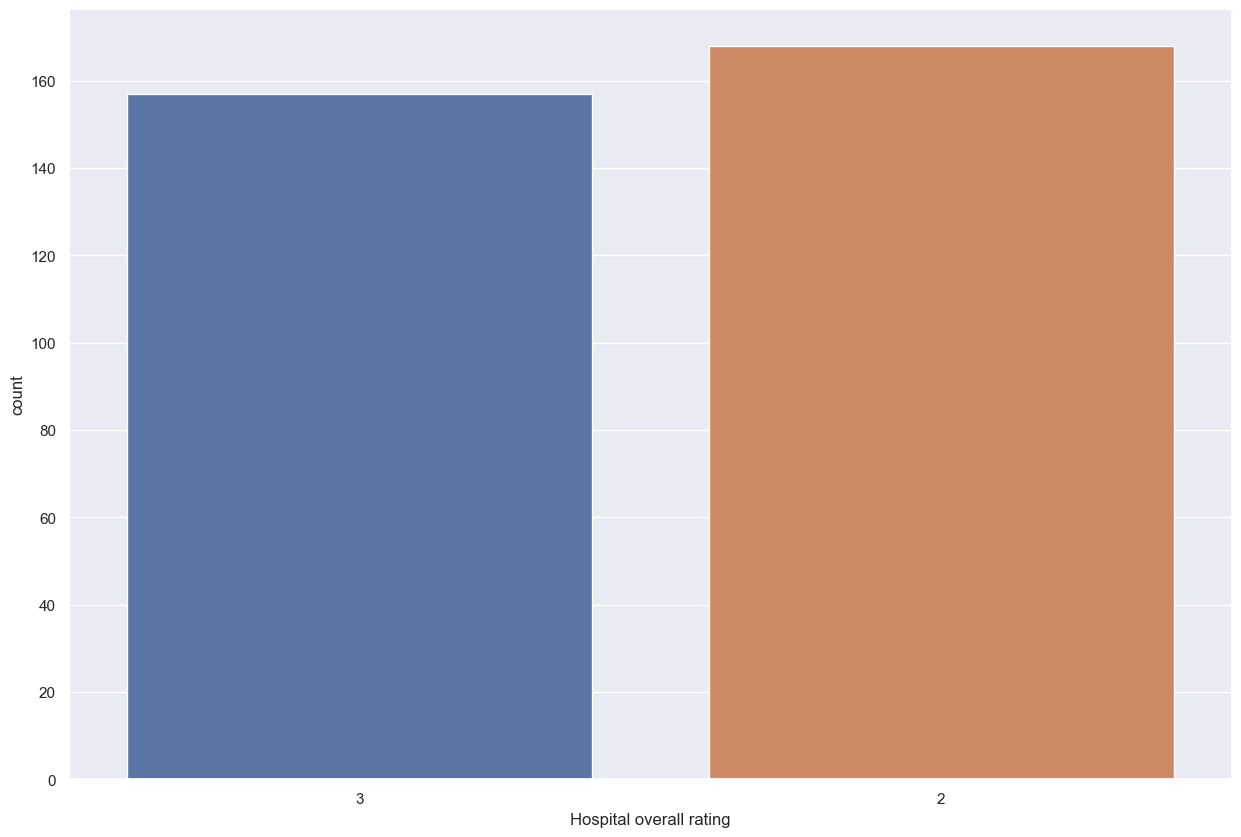

In [75]:
sns.set(rc={'figure.figsize':(15,10)});
sns.countplot(x=hosp_df["Hospital overall rating"]);

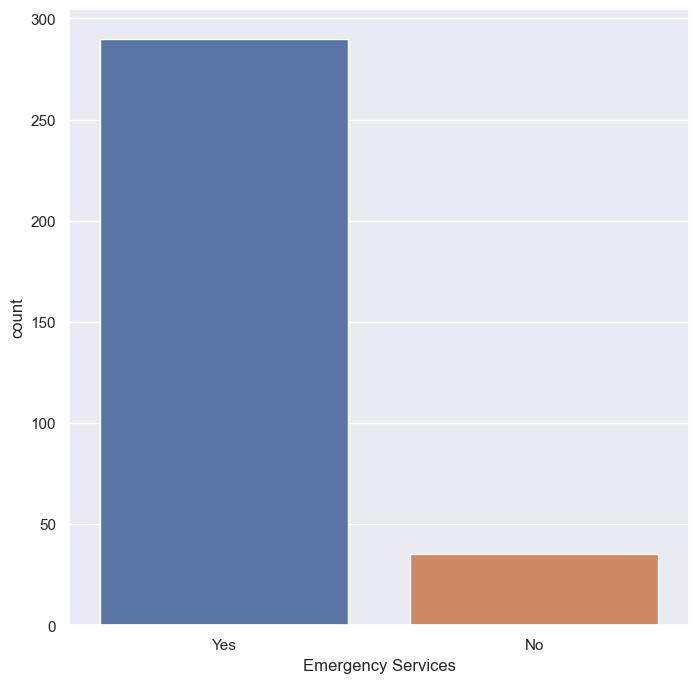

In [76]:
sns.set(rc={'figure.figsize':(8,8)});
sns.countplot(x=hosp_df["Emergency Services"]);

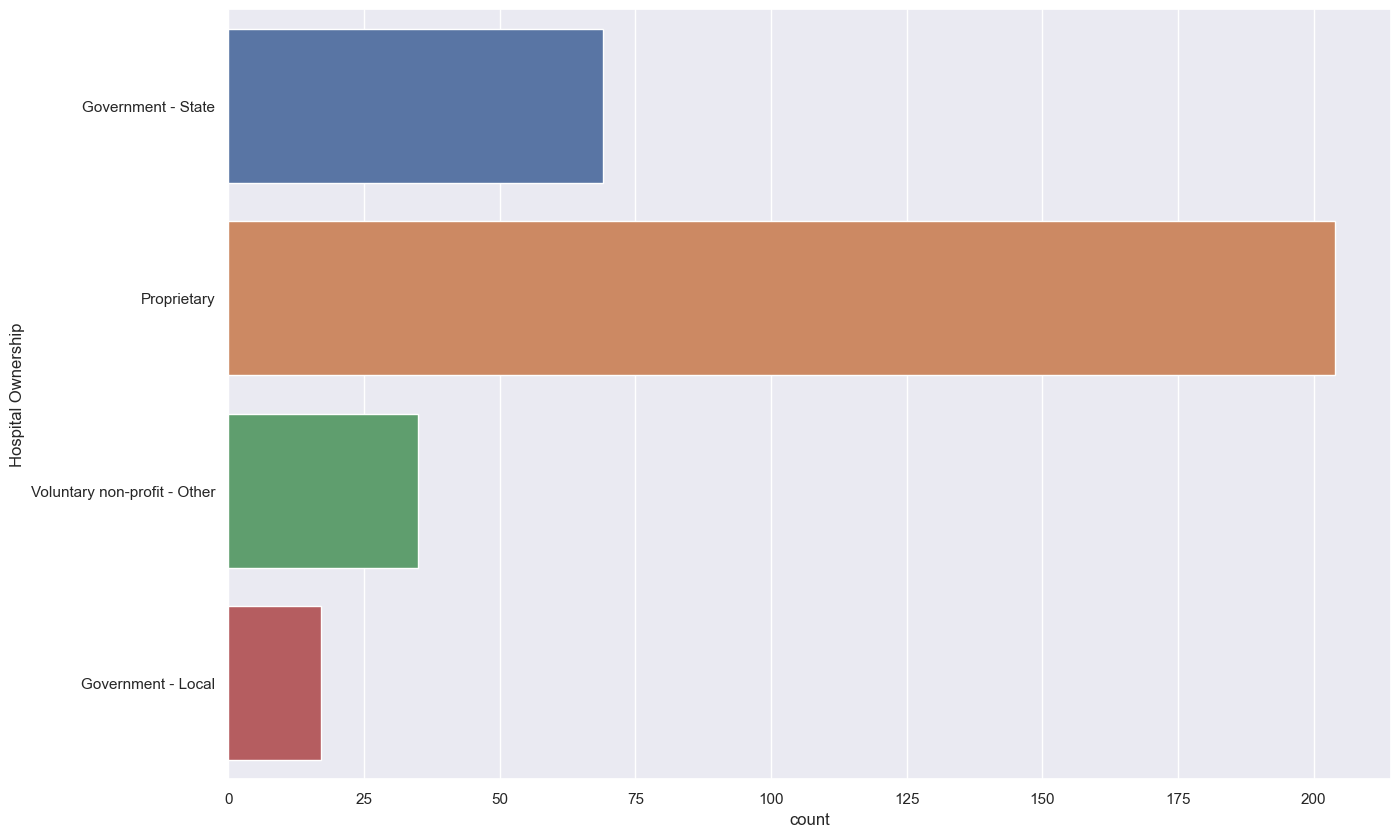

In [77]:
sns.set(rc={'figure.figsize':(15,10)});
sns.countplot(y=hosp_df["Hospital Ownership"]);

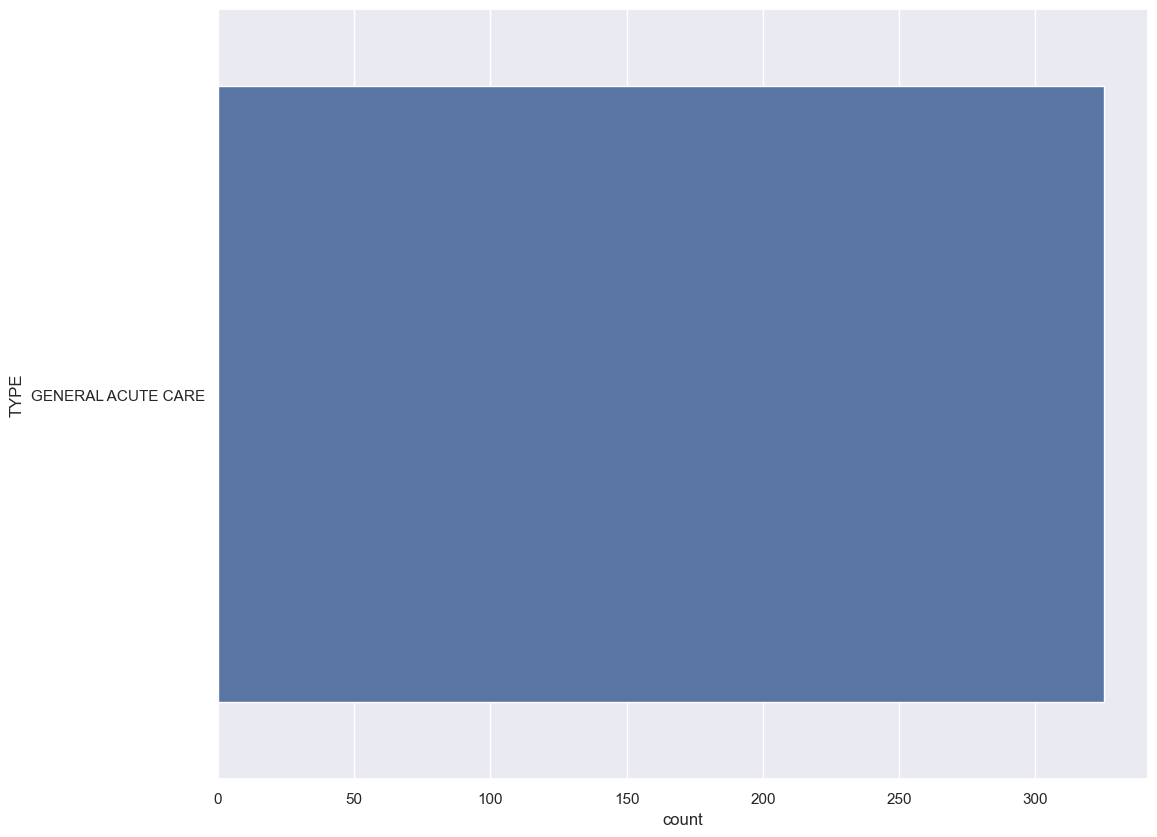

In [81]:
sns.set(rc={'figure.figsize':(12,10)});
sns.countplot(y=hosp_df["TYPE"]);

In [82]:
hosp_df.groupby(['Provider Name', 'LATITUDE', 'LONGITUDE'])[[' Average Covered Charges ']].mean().sort_values(by=[' Average Covered Charges '], ascending=False)

,,,Average Covered Charges
Provider Name,LATITUDE,LONGITUDE,
OLYMPIA MEDICAL CENTER,34.057292,-118.360527,102538.674091
KECK HOSPITAL OF USC,34.062030,-118.201311,99331.340571
RONALD REAGAN UCLA MEDICAL CENTER,34.066554,-118.446625,78459.979275
HOLLYWOOD PRESBYTERIAN MEDICAL CENTER,34.096451,-118.290470,63191.707121
LAC+USC MEDICAL CENTER,34.059562,-118.208357,50866.719412
EAST LOS ANGELES DOCTORS HOSPITAL,34.023647,-118.184165,41233.505263
LOS ANGELES COMMUNITY HOSPITAL,34.019346,-118.186514,38275.311321


In [125]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=10)

In [126]:
# add marker one by one on the map
for i in range(0,len(hosp_df)):
   folium.Marker(
      location=[hosp_df.iloc[i]['LATITUDE'], hosp_df.iloc[i]['LONGITUDE']],
      popup=hosp_df.iloc[i]['Provider Name'],
   ).add_to(m)

# Show the map again
m

#### Hospital Geo dataset

In [89]:
hospital_geo = hospital_geo.drop(columns='dis_status', axis =1)

In [90]:
hospital_geo.columns

Index(['OBJECTID', 'source', 'ext_id', 'cat1', 'cat2', 'cat3', 'org_name',
       'Name', 'addrln1', 'addrln2', 'city', 'state', 'hours', 'phones', 'url',
       'info1', 'info2', 'post_id', 'description', 'zip', 'link', 'use_type',
       'latitude', 'longitude', 'email', 'POINT_X', 'POINT_Y', 'geometry'],
      dtype='object')

In [92]:
hospital_geo = hospital_geo.drop(columns='email', axis =1)

In [93]:
hospital_geo = hospital_geo.drop(columns='phones', axis =1)

In [94]:
hospital_geo = hospital_geo.drop(columns='ext_id', axis =1)

In [95]:
# removing null values from cat3, org_name, addrln1, city, state, hours, zip
hospital_geo = hospital_geo.dropna(subset=['cat3', 'org_name', 'addrln1', 'city', 'state', 'hours', 'zip'])

In [97]:
# info1 and info2 have number of bed spaces but have a lot of missing values and imputation wouldn't be a good idea on this
hospital_geo = hospital_geo.drop(columns=['info1', 'info2'], axis = 1)

In [98]:
# dropping the addrln2 column
hospital_geo = hospital_geo.drop(columns='addrln2', axis =1)

<Axes: >

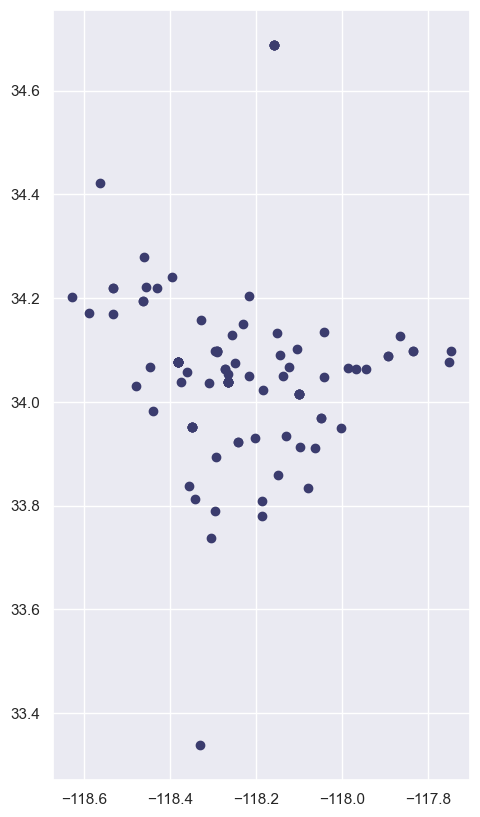

In [99]:
hospital_geo.plot(figsize=(10,10), color='#3B3C6E')

In [100]:
hospital_geo.columns

Index(['OBJECTID', 'source', 'cat1', 'cat2', 'cat3', 'org_name', 'Name',
       'addrln1', 'city', 'state', 'hours', 'url', 'post_id', 'description',
       'zip', 'link', 'use_type', 'latitude', 'longitude', 'POINT_X',
       'POINT_Y', 'geometry'],
      dtype='object')

In [117]:
hospital_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 100 entries, 0 to 159
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     100 non-null    int64   
 1   source       94 non-null     object  
 2   cat1         100 non-null    object  
 3   cat2         100 non-null    object  
 4   cat3         100 non-null    object  
 5   org_name     100 non-null    object  
 6   Name         100 non-null    object  
 7   addrln1      100 non-null    object  
 8   city         100 non-null    object  
 9   state        100 non-null    object  
 10  hours        100 non-null    object  
 11  url          100 non-null    object  
 12  post_id      100 non-null    int64   
 13  description  100 non-null    object  
 14  zip          100 non-null    object  
 15  link         100 non-null    object  
 16  use_type     100 non-null    object  
 17  latitude     100 non-null    float64 
 18  longitude    100 non-n

In [127]:
# import the library
import folium

# # Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [128]:
# add marker one by one on the map
for i in range(0,len(hospital_geo)):
   folium.Marker(
      location=[hospital_geo.iloc[i]['latitude'], hospital_geo.iloc[i]['longitude']],
      popup=hospital_geo.iloc[i]['Name'],
   ).add_to(m)

# Show the map again
m

#### Doctor

In [130]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1311 to 1505
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      195 non-null    object
 1   County                    195 non-null    object
 2   Primary Area of Practice  195 non-null    object
 3   Activities in Medicine    195 non-null    object
 4   Count of Physicians       195 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 9.1+ KB


In [132]:
doctors.head(10)

,Date,County,Primary Area of Practice,Activities in Medicine,Count of Physicians
1311,7/1/20,Los Angeles,All Other Specialties,No Response,33
1312,7/1/20,Los Angeles,All Other Specialties,Patient Care - 1-9 Hours,203
1313,7/1/20,Los Angeles,All Other Specialties,Patient Care - 10-19 Hours,213
1314,7/1/20,Los Angeles,All Other Specialties,Patient Care - 20-29 Hours,376
1315,7/1/20,Los Angeles,All Other Specialties,Patient Care - 30-39 Hours,609
1316,7/1/20,Los Angeles,All Other Specialties,Patient Care - 40+ Hours,1543
1317,7/1/20,Los Angeles,All Other Specialties,Patient Care - None,313
1318,7/1/20,Los Angeles,Anesthesiology - Primary,No Response,3
1319,7/1/20,Los Angeles,Anesthesiology - Primary,Patient Care - 1-9 Hours,55
1320,7/1/20,Los Angeles,Anesthesiology - Primary,Patient Care - 10-19 Hours,48


<Axes: >

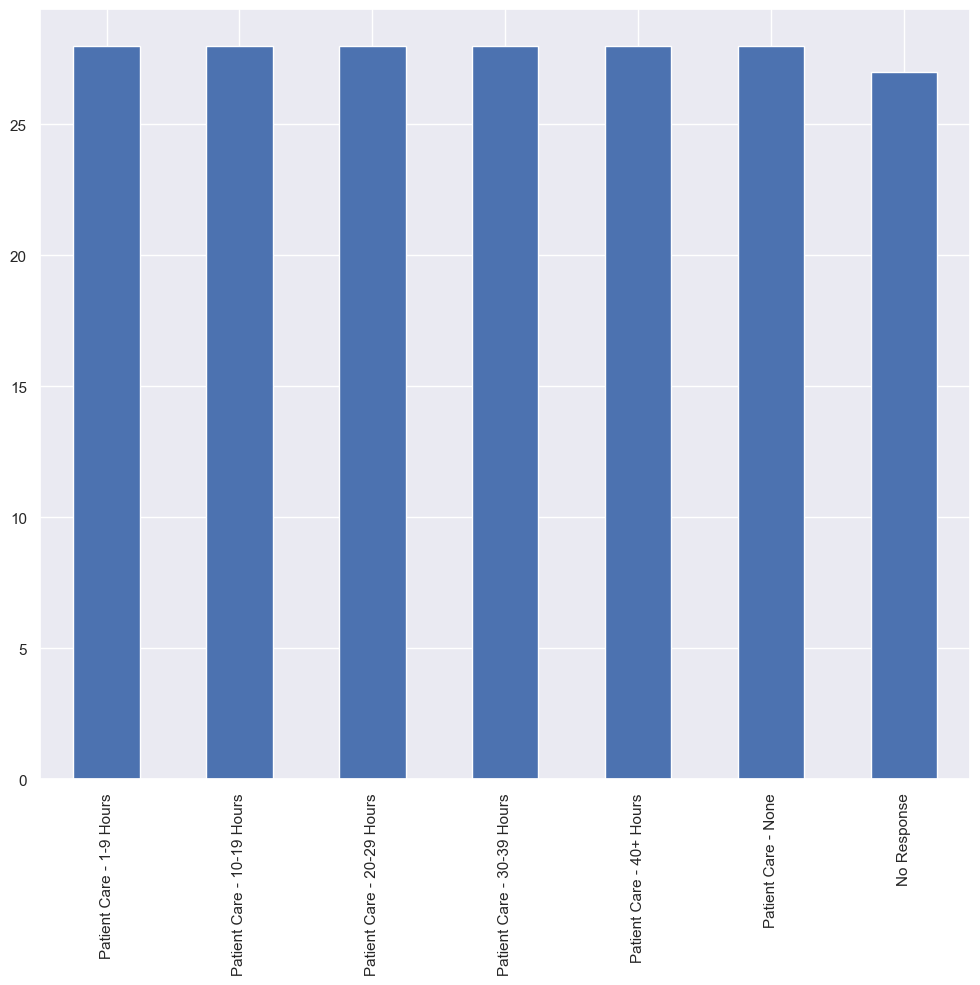

In [141]:
doctors['Activities in Medicine'].value_counts(sort=True).plot.bar(rot=90)

<Axes: >

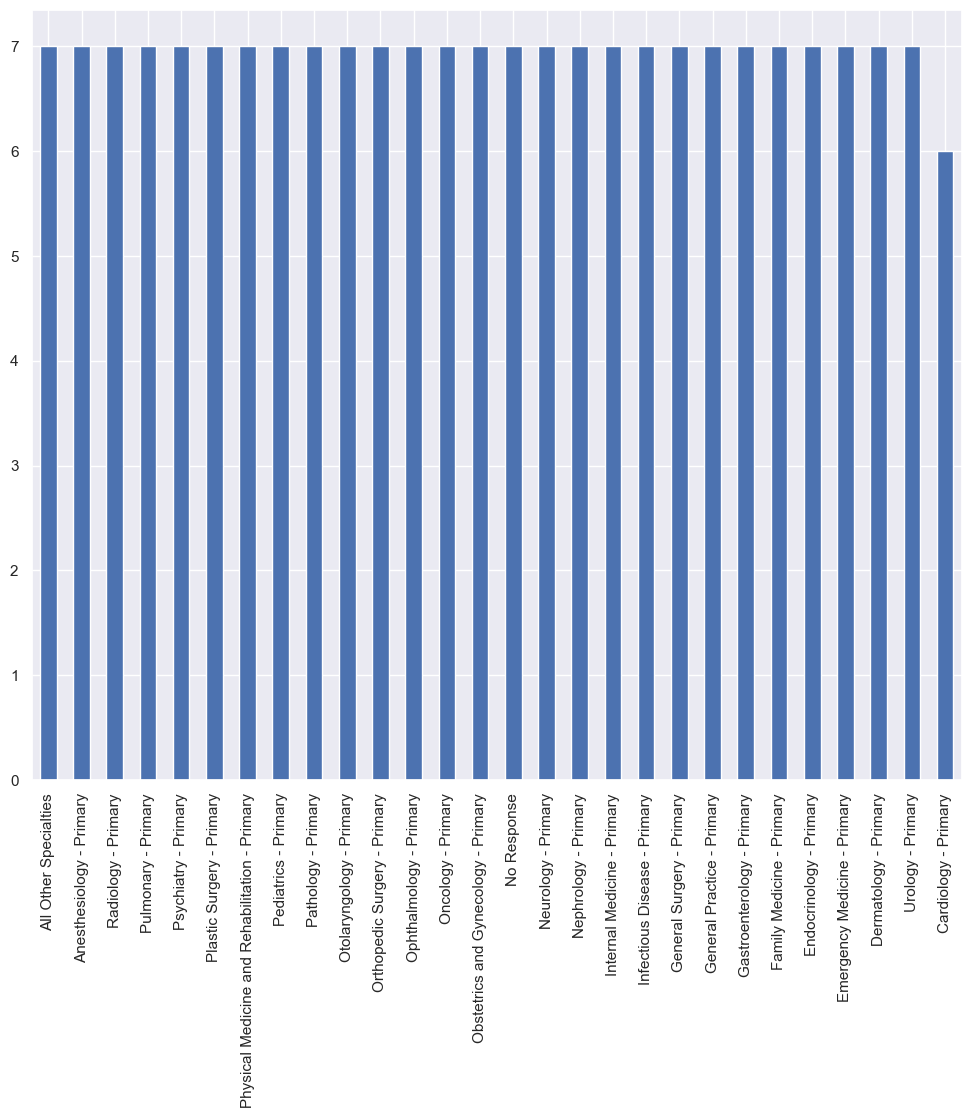

In [142]:
doctors['Primary Area of Practice'].value_counts(sort=True).plot.bar(rot=90)